Importing Necessary Modules


In [644]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Loading the Dataset


In [645]:
df= pd.read_csv('./house.csv')

Display Random 10 Observations

In [646]:
df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
402,403,30,RL,60.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,8,2008,WD,Normal,108000
827,828,20,RL,65.0,8529,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,189000
1398,1399,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,138000
902,903,60,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,180000
42,43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
758,759,160,FV,24.0,2280,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,179400
321,322,60,RL,99.0,12099,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,354000
526,527,20,RL,70.0,13300,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,132000
510,511,20,RL,75.0,14559,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,2000,6,2009,WD,Normal,164900


Selecting Necessary features

In [647]:
df=pd.DataFrame(data=df,columns=['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',  
    'LotArea', 'GrLivArea', 'TotalBsmtSF','BedroomAbvGr','SalePrice'])

In [648]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [649]:
df.head()

,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,LotArea,GrLivArea,TotalBsmtSF,BedroomAbvGr,SalePrice
0,2,1,1,0,8450,1710,856,3,208500
1,2,0,0,1,9600,1262,1262,3,181500
2,2,1,1,0,11250,1786,920,3,223500
3,1,0,1,0,9550,1717,756,3,140000
4,2,1,1,0,14260,2198,1145,4,250000


In [650]:
df['TotalSqFt'] = df['GrLivArea'] + df['TotalBsmtSF']  # Combine above ground and basement square footage
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']  # Combine bathrooms


In [651]:
df.head()

,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,LotArea,GrLivArea,TotalBsmtSF,BedroomAbvGr,SalePrice,TotalSqFt,TotalBath
0,2,1,1,0,8450,1710,856,3,208500,2566,3.5
1,2,0,0,1,9600,1262,1262,3,181500,2524,2.5
2,2,1,1,0,11250,1786,920,3,223500,2706,3.5
3,1,0,1,0,9550,1717,756,3,140000,2473,2.0
4,2,1,1,0,14260,2198,1145,4,250000,3343,3.5


In [652]:
df.drop(columns=['FullBath',	'HalfBath',	'BsmtFullBath',	'BsmtHalfBath',	'LotArea',	'GrLivArea',	'TotalBsmtSF'],inplace=True)

In [653]:
df.head()

,BedroomAbvGr,SalePrice,TotalSqFt,TotalBath
0,3,208500,2566,3.5
1,3,181500,2524,2.5
2,3,223500,2706,3.5
3,3,140000,2473,2.0
4,4,250000,3343,3.5


In [654]:
new_column_order =[col for col in df.columns if col != 'SalePrice'] + ['SalePrice']

In [655]:
df = df[new_column_order]

In [656]:
df.sample(5)

,BedroomAbvGr,TotalSqFt,TotalBath,SalePrice
588,1,2910,3.0,143000
843,6,3600,2.0,141000
365,3,2016,1.0,147000
860,3,2338,1.5,189950
66,3,4154,3.0,180000


In [657]:
df.isnull().sum()

BedroomAbvGr    0
TotalSqFt       0
TotalBath       0
SalePrice       0
dtype: int64

In [658]:
df.shape

(1460, 4)

Checking Duplicates

In [659]:
df.duplicated().sum()


4

In [660]:
df[df.duplicated()]

,BedroomAbvGr,TotalSqFt,TotalBath,SalePrice
193,3,2679,2.0,130000
831,2,1800,2.5,151000
1231,3,2296,2.0,132500
1436,3,1728,1.0,120500


Droping Duplicated Values

In [661]:
df.drop([831],inplace=True)

In [662]:
df.drop([1231],inplace=True)
df.drop([1436],inplace=True)
df.drop([193],inplace=True)

In [663]:
df

,BedroomAbvGr,TotalSqFt,TotalBath,SalePrice
0,3,2566,3.5,208500
1,3,2524,2.5,181500
2,3,2706,3.5,223500
3,3,2473,2.0,140000
4,4,3343,3.5,250000
...,...,...,...,...
1455,3,2600,2.5,175000
1456,3,3615,3.0,210000
1457,4,3492,2.0,266500
1458,2,2156,2.0,142125


In [664]:
df.duplicated().sum()

0

In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BedroomAbvGr  1456 non-null   int64  
 1   TotalSqFt     1456 non-null   int64  
 2   TotalBath     1456 non-null   float64
 3   SalePrice     1456 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 56.9 KB


In [666]:
df.shape

(1456, 4)

Seperating Train and Test Data

In [667]:
x = df.iloc[:,:-1]
y = df['SalePrice']

In [668]:
x

,BedroomAbvGr,TotalSqFt,TotalBath
0,3,2566,3.5
1,3,2524,2.5
2,3,2706,3.5
3,3,2473,2.0
4,4,3343,3.5
...,...,...,...
1455,3,2600,2.5
1456,3,3615,3.0
1457,4,3492,2.0
1458,2,2156,2.0


In [669]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1456, dtype: int64

In [670]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [671]:
x_train

,BedroomAbvGr,TotalSqFt,TotalBath
758,3,2245,2.5
599,3,2272,3.5
216,3,2872,3.0
135,3,2986,2.0
373,3,1927,2.0
...,...,...,...
716,3,3272,1.5
907,3,3074,1.5
1098,3,1996,1.0
236,3,2828,2.0


In [672]:
y_train

758     179400
599     151000
216     210000
135     174000
373     123000
         ...  
716     159500
907     250000
1098    128000
236     185500
1063    110500
Name: SalePrice, Length: 1164, dtype: int64

Scaling the Input features

In [673]:
scaler = StandardScaler()
x_train_transformed = scaler.fit_transform(x_train)
x_test_transformed = scaler.transform(x_test)

Traning Model on Traning Data

In [674]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

Use Model For Prediction On Test Data

In [675]:
y_pred = lr.predict(x_test_transformed)
y_pred

array([188936.24513612, 139654.67633567, 132262.90932943, 140887.65218334,
       159306.17020868, 160969.89146952, 188837.3512525 , 166513.13133191,
       208895.2805003 , 121088.64434994, 204459.47099443, 320602.54089122,
       147933.1808343 ,  94255.43601974, 190130.99243352, 135651.95381212,
       113375.88565447, 152653.15842062, 208723.45650153, 150718.71927738,
       411772.97485823, 247248.52385144, 204397.4007196 , 136009.76911013,
       174350.03057704, 163272.53743727, 135897.42502846, 203129.00620463,
       180656.335696  , 134173.50674811, 206085.43201883, 120989.75046632,
       144644.90349054,  61274.07684605, 137314.7384453 , 142871.42850575,
       191092.78208497,  95980.29092775, 195750.22108262, 179573.21537786,
       261564.02052813, 189799.14090396, 151890.56147788, 237010.08475495,
       287683.7203062 , 239623.33088543, 111726.08290551, 290629.75459389,
        96325.59265537, 390965.43055193, 159676.25028851, 173905.36665198,
       158468.05279305, 2

In [676]:
y_pred.shape

(292,)

Calculating R^^2 Score

In [677]:
r2_score(y_test,y_pred)

0.7463844932767951

Calculating cross Validation Score

In [678]:
np.mean(cross_val_score(lr,x,y,cv=5,scoring='r2'))

0.6501109446517555

In [679]:
print(y_test.index)

Index([1108,  111, 1274, 1147,  369,   37, 1128,  993,  158, 1406,
       ...
         98,  902, 1062,  613,  488,  281, 1401,  131,  900, 1249],
      dtype='int64', length=292)


In [680]:
y_pred

array([188936.24513612, 139654.67633567, 132262.90932943, 140887.65218334,
       159306.17020868, 160969.89146952, 188837.3512525 , 166513.13133191,
       208895.2805003 , 121088.64434994, 204459.47099443, 320602.54089122,
       147933.1808343 ,  94255.43601974, 190130.99243352, 135651.95381212,
       113375.88565447, 152653.15842062, 208723.45650153, 150718.71927738,
       411772.97485823, 247248.52385144, 204397.4007196 , 136009.76911013,
       174350.03057704, 163272.53743727, 135897.42502846, 203129.00620463,
       180656.335696  , 134173.50674811, 206085.43201883, 120989.75046632,
       144644.90349054,  61274.07684605, 137314.7384453 , 142871.42850575,
       191092.78208497,  95980.29092775, 195750.22108262, 179573.21537786,
       261564.02052813, 189799.14090396, 151890.56147788, 237010.08475495,
       287683.7203062 , 239623.33088543, 111726.08290551, 290629.75459389,
        96325.59265537, 390965.43055193, 159676.25028851, 173905.36665198,
       158468.05279305, 2

Plotting The Regression Line on top of y_test v/s y_pred

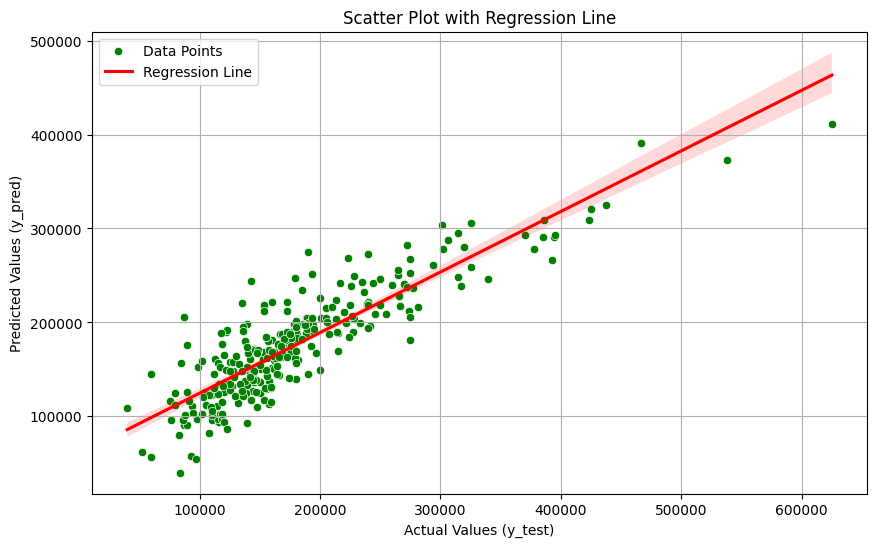

In [681]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your actual and predicted values respectively

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Data Points',c='green')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red',label='Regression Line')

# Adding titles and labels
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()


Calculating Root Mean Squared Error

In [682]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [683]:
rmse

40008.5370028972

Plotting Residuals Distribution plot to show relation between actual and predicted value

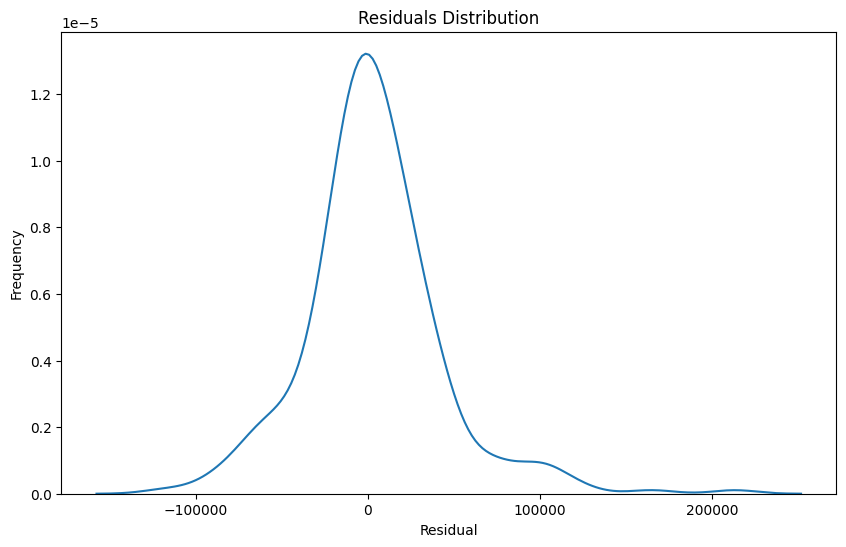

In [684]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()
